In [148]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

[1] "pcos-diagnosis-dataset"

# **Import**
---------

In [149]:
library(tidymodels)
library(tidyverse)
library(dplyr)
library(ggplot2)
library(gridExtra)
library(psych)
library(ggcorrplot)
library(GGally)

# **1. Data Import & EDA**
---------------------

In [150]:
df <- read.csv('/kaggle/input/pcos-diagnosis-dataset/pcos_dataset.csv') %>% janitor::clean_names()

### **Data Description**
* Age (years): The age of the patient, ranging from 18 to 45 years.

* BMI (kg/m²): The Body Mass Index, which is a measure of body fat based on height and weight, ranging from 18 to 35.

* Menstrual Irregularity (binary): A binary indicator showing whether the patient has irregular menstrual cycles (0 = No, 1 = Yes).

* Testosterone Level (ng/dL): The level of testosterone in the patient's blood, an important hormonal indicator of PCOS, ranging from 20 to 100 ng/dL.

* Antral Follicle Count: The number of antral follicles detected during an ultrasound, ranging from 5 to 30, which helps in assessing ovarian reserve and PCOS presence.

* PCOS Diagnosis (binary): A binary indicator of whether the patient has been diagnosed with PCOS (0 = No, 1 = Yes), based on a combination of risk factors such as high BMI, testosterone levels, menstrual irregularity, and antral follicle count.

## **Summary**

In [151]:
str(df)

'data.frame':	1000 obs. of  6 variables:
 $ age                      : int  24 37 32 28 25 38 24 43 36 40 ...
 $ bmi                      : num  34.7 26.4 23.6 28.8 22.1 19.3 20.2 20.2 20.6 20.4 ...
 $ menstrual_irregularity   : int  1 0 0 0 1 0 1 1 0 0 ...
 $ testosterone_level_ng_d_l: num  25.2 57.1 92.7 63.1 59.8 28.4 72.5 85.8 50.4 82 ...
 $ antral_follicle_count    : int  20 25 28 26 8 6 29 17 5 21 ...
 $ pcos_diagnosis           : int  0 0 0 0 0 0 0 0 0 0 ...


In [152]:
summary(df)

      age             bmi        menstrual_irregularity
 Min.   :18.00   Min.   :18.10   Min.   :0.00          
 1st Qu.:24.00   1st Qu.:21.90   1st Qu.:0.00          
 Median :32.00   Median :26.40   Median :1.00          
 Mean   :31.77   Mean   :26.39   Mean   :0.53          
 3rd Qu.:39.00   3rd Qu.:30.50   3rd Qu.:1.00          
 Max.   :45.00   Max.   :35.00   Max.   :1.00          
 testosterone_level_ng_d_l antral_follicle_count pcos_diagnosis 
 Min.   :20.00             Min.   : 5.00         Min.   :0.000  
 1st Qu.:41.70             1st Qu.:12.00         1st Qu.:0.000  
 Median :60.00             Median :18.00         Median :0.000  
 Mean   :60.16             Mean   :17.47         Mean   :0.199  
 3rd Qu.:80.30             3rd Qu.:23.25         3rd Qu.:0.000  
 Max.   :99.80             Max.   :29.00         Max.   :1.000  

In [153]:
describe(df)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
age,1,1000,31.7710,8.4634620,32.0,31.83000,11.86080,18.0,45.0,27.0,-0.06022087,-1.2769934,0.26763817
bmi,2,1000,26.3870,4.9355395,26.4,26.36450,6.37518,18.1,35.0,16.9,0.02375833,-1.2345218,0.15607546
menstrual_irregularity,3,1000,0.5300,0.4993489,1.0,0.53750,0.00000,0.0,1.0,1.0,-0.12003631,-1.9875759,0.01579080
testosterone_level_ng_d_l,4,1000,60.1595,23.1602039,60.0,60.23200,28.46592,20.0,99.8,79.8,-0.01926932,-1.1860413,0.73238995
antral_follicle_count,5,1000,17.4690,7.0693008,18.0,17.56000,8.89560,5.0,29.0,24.0,-0.07617768,-1.1582608,0.22355092
pcos_diagnosis,6,1000,0.1990,0.3994478,0.0,0.12375,0.00000,0.0,1.0,1.0,1.50557338,0.2670212,0.01263165


In [154]:
skim_df <- skimr::skim(df)
print(skim_df)

── Data Summary ────────────────────────
                           Values
Name                       df    
Number of rows             1000  
Number of columns          6     
_______________________          
Column type frequency:           
  numeric                  6     
________________________         
Group variables            None  

── Variable type: numeric ──────────────────────────────────────────────────────
  skim_variable             n_missing complete_rate   mean     sd   p0  p25  p50
1 age                               0             1 31.8    8.46  18   24   32  
2 bmi                               0             1 26.4    4.94  18.1 21.9 26.4
3 menstrual_irregularity            0             1  0.53   0.499  0    0    1  
4 testosterone_level_ng_d_l         0             1 60.2   23.2   20   41.7 60  
5 antral_follicle_count             0             1 17.5    7.07   5   12   18  
6 pcos_diagnosis                    0             1  0.199  0.399  0    0    0  
   p

## **Checking Missing Value & Duplicate Value**

In [155]:
na <- data.frame(NaN_Count = colSums(is.na(df)))
na

,NaN_Count
,<dbl>
age,0
bmi,0
menstrual_irregularity,0
testosterone_level_ng_d_l,0
antral_follicle_count,0
pcos_diagnosis,0


In [156]:
sum(duplicated(df))

[1] 0

## **Data Check**

In [157]:
head(df)

,age,bmi,menstrual_irregularity,testosterone_level_ng_d_l,antral_follicle_count,pcos_diagnosis
,<int>,<dbl>,<int>,<dbl>,<int>,<int>
1,24,34.7,1,25.2,20,0
2,37,26.4,0,57.1,25,0
3,32,23.6,0,92.7,28,0
4,28,28.8,0,63.1,26,0
5,25,22.1,1,59.8,8,0
6,38,19.3,0,28.4,6,0


In [158]:
tail(df)

,age,bmi,menstrual_irregularity,testosterone_level_ng_d_l,antral_follicle_count,pcos_diagnosis
,<int>,<dbl>,<int>,<dbl>,<int>,<int>
995,27,19.6,1,89.3,14,0
996,34,18.4,1,95.7,23,0
997,45,28.9,1,28.5,7,0
998,37,28.3,0,32.4,28,0
999,41,27.3,0,95.6,9,0
1000,22,21.9,1,78.9,7,0


# **2. Data Visulization**
------------

In [159]:
#numeric cols
num_cols <- df %>% select(where(is.numeric)) %>% colnames()

In [160]:
cat('Numeric columns:',num_cols)

Numeric columns: age bmi menstrual_irregularity testosterone_level_ng_d_l antral_follicle_count pcos_diagnosis

## **Histogram & Boxplot & Densityplot**

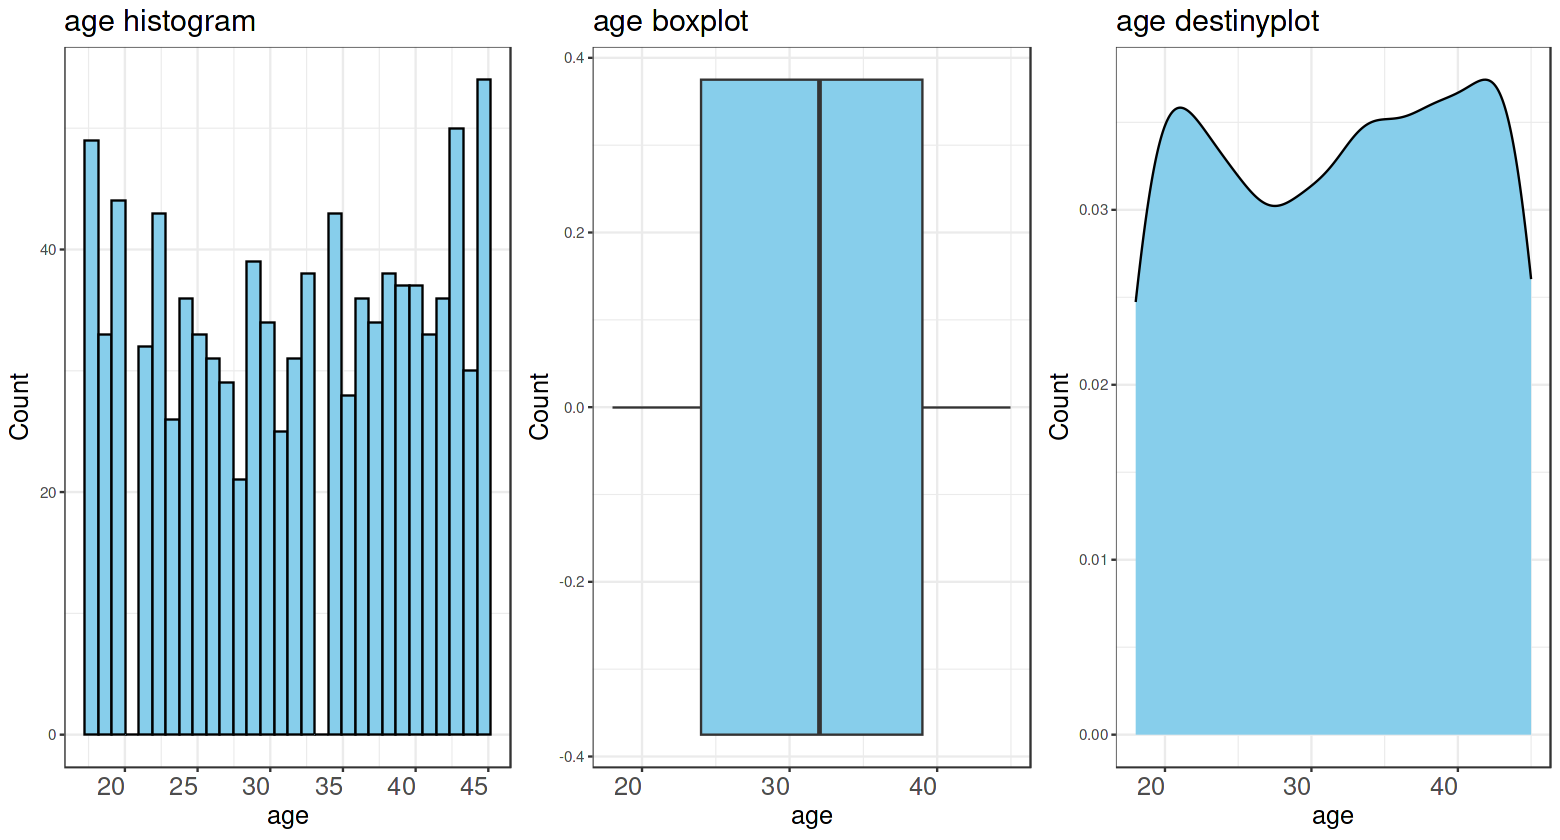

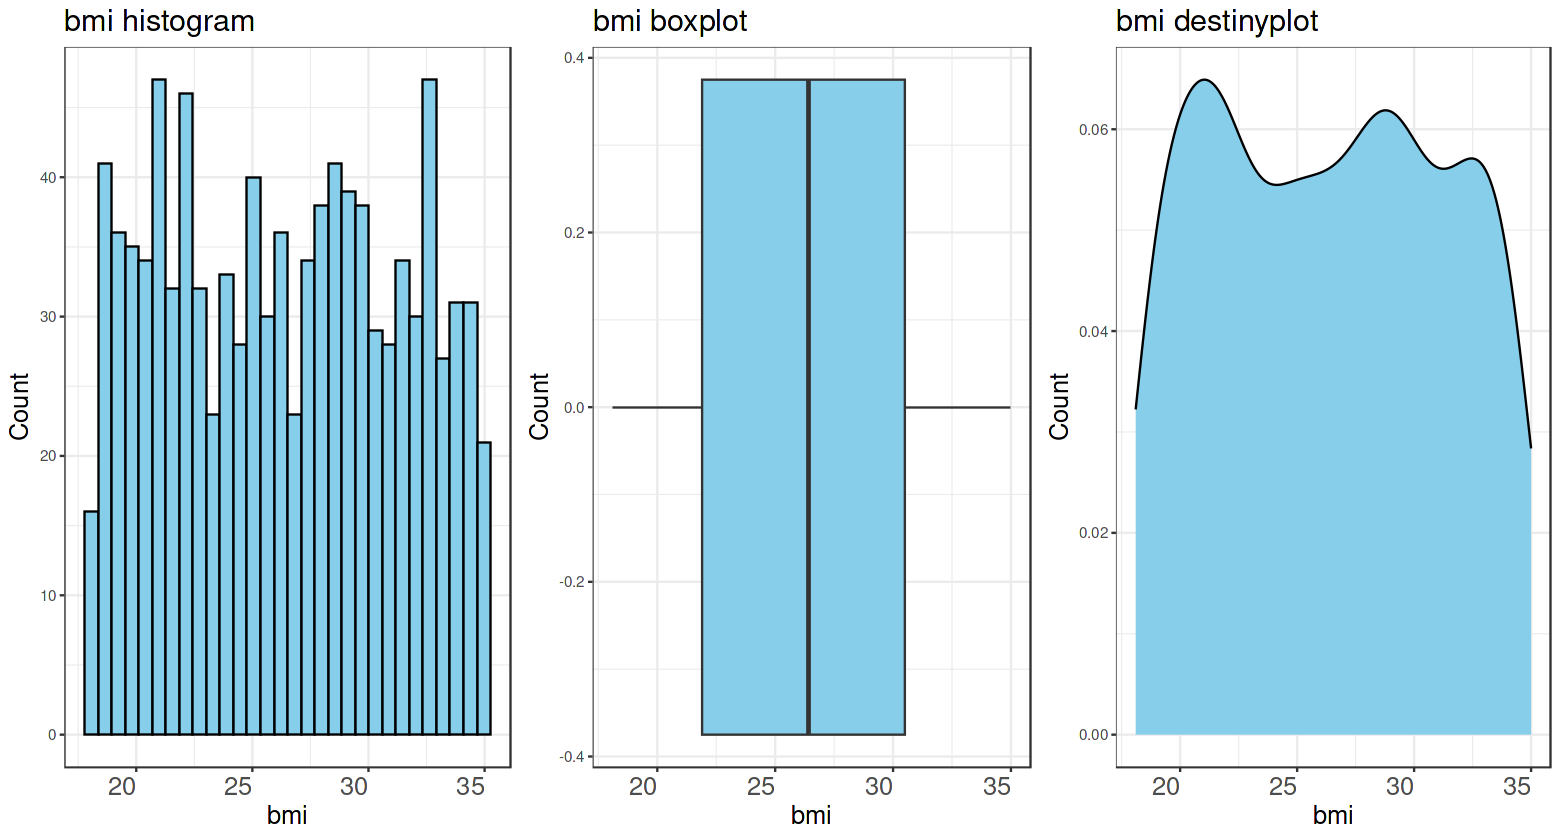

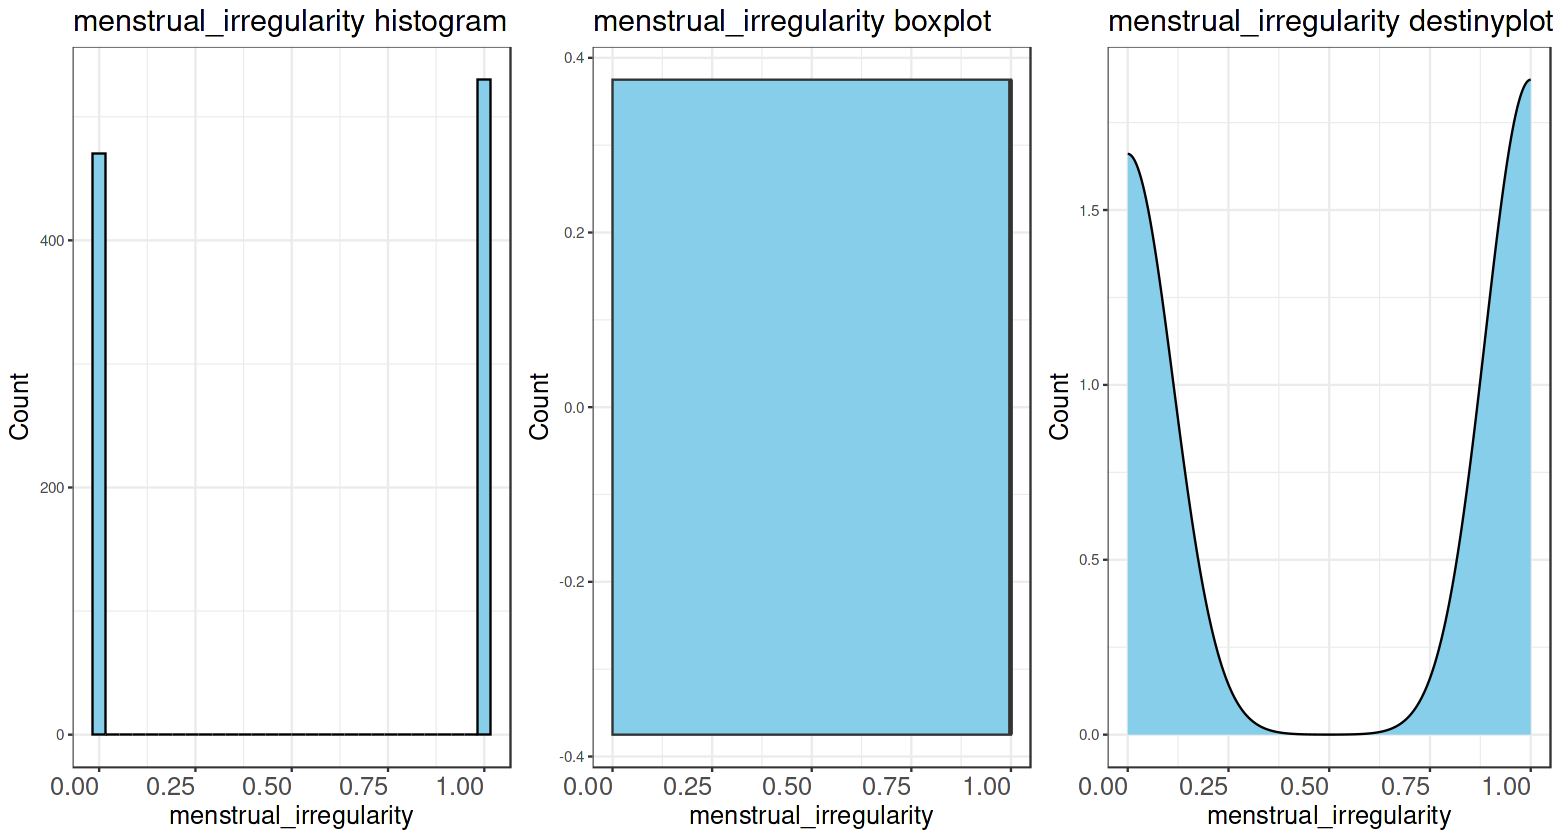

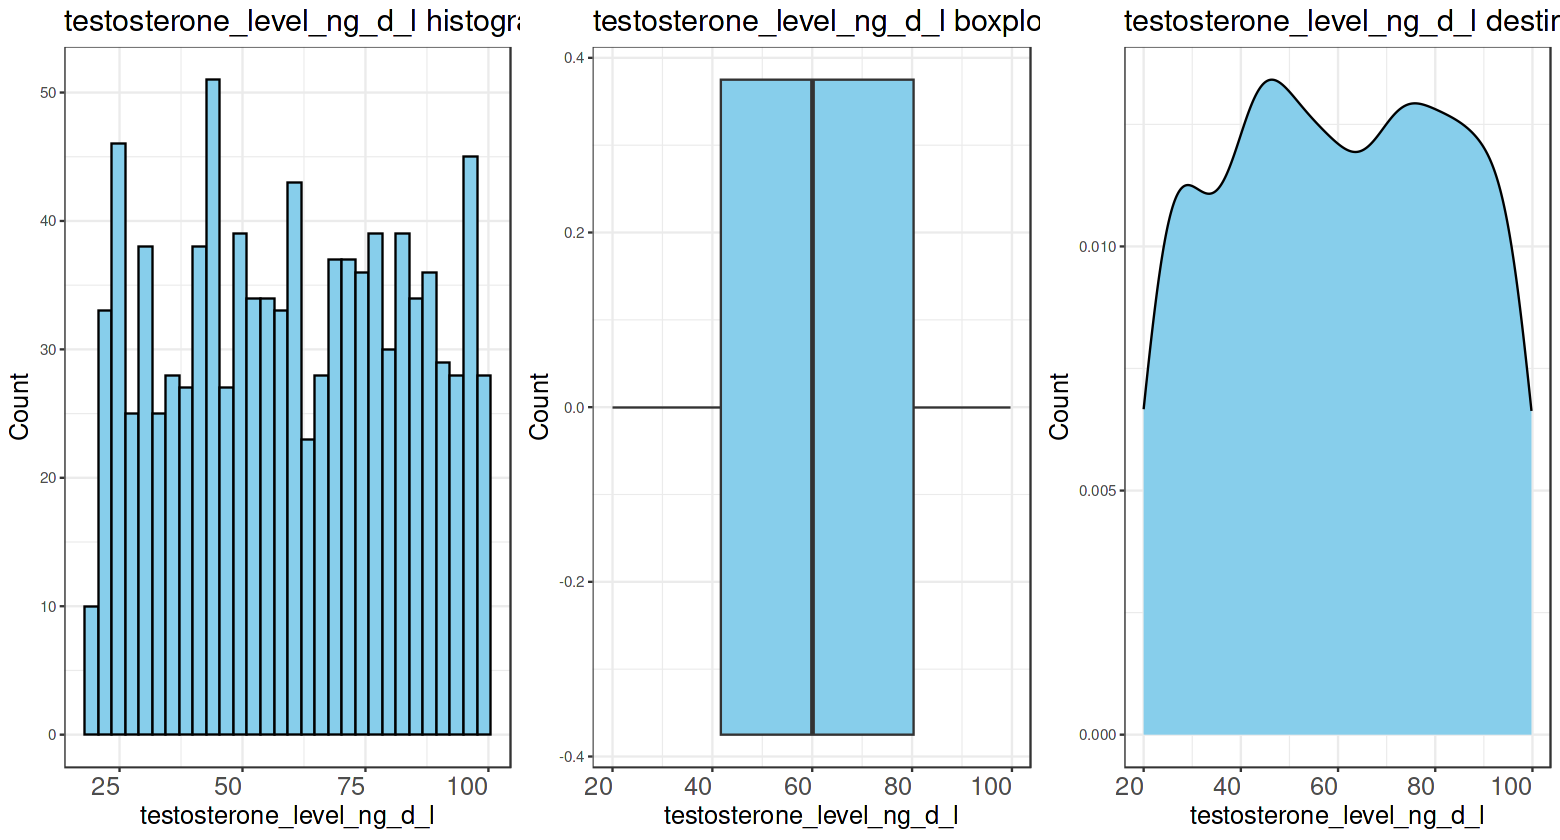

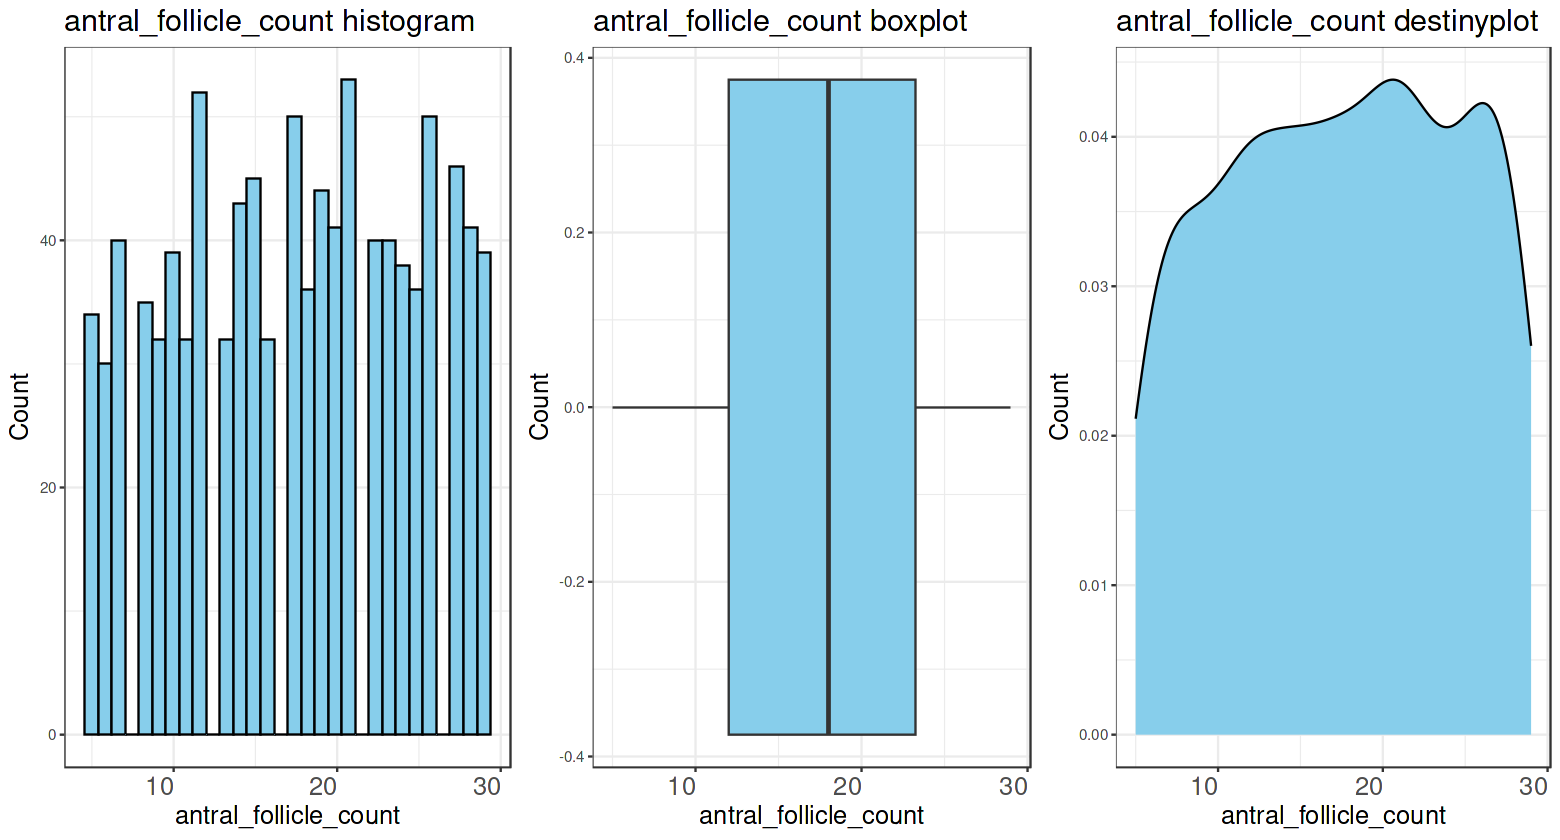

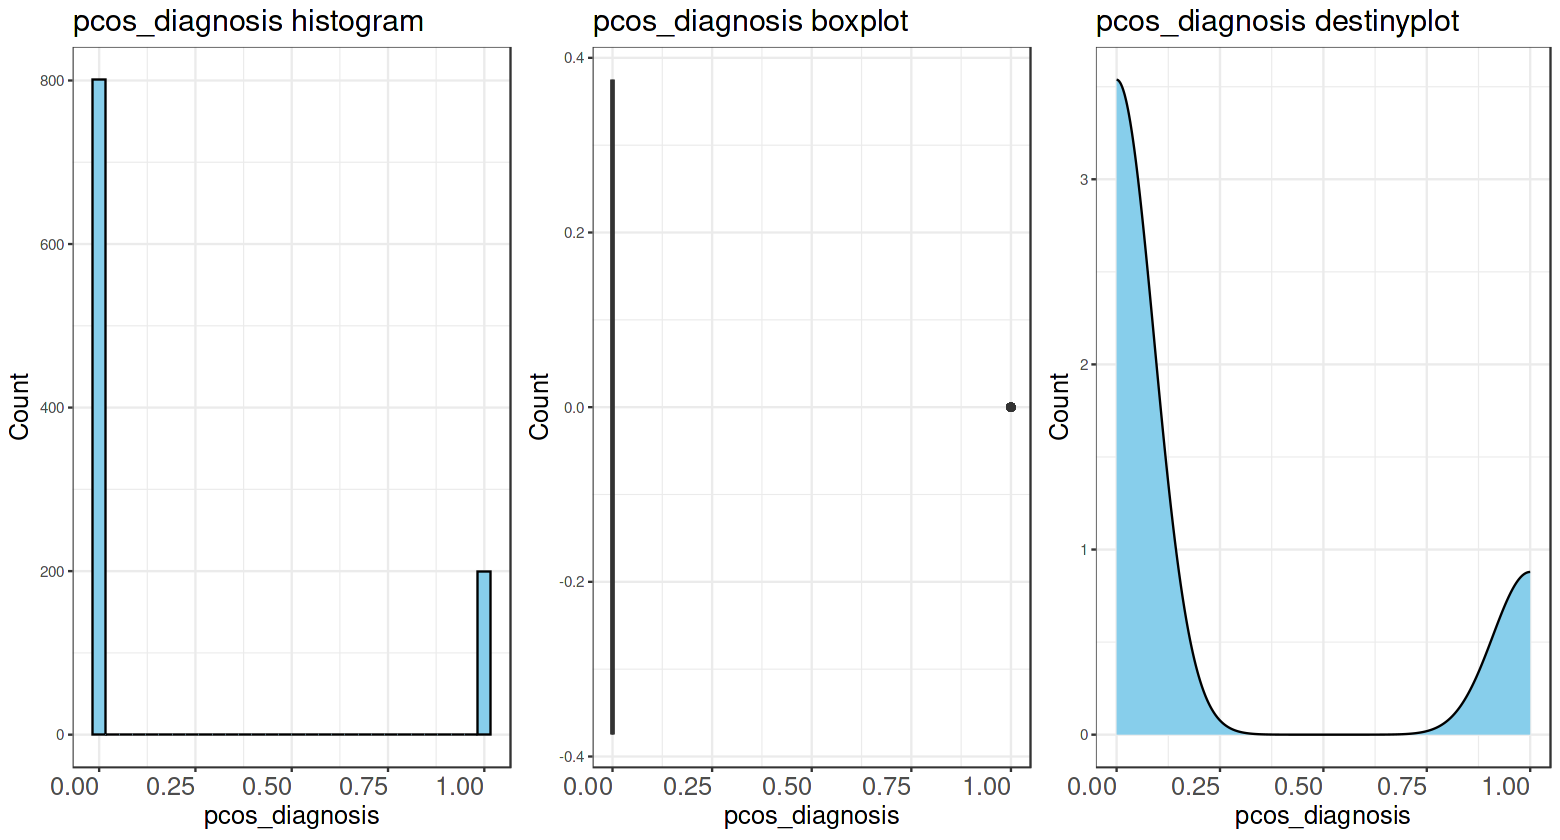

In [161]:
options(repr.plot.width = 13.0, repr.plot.height = 7.0)

for(i in num_cols){
    a <- ggplot(df) + geom_histogram(aes(x= df[,i]), fill = 'skyblue', col = 'black', position = 'dodge', bins= 30) + 
            labs(title = paste0(names(df[i]),' histogram'), x = names(df[i]), y = 'Count') + 
            theme_bw() +
            theme(axis.title = element_text(size=15),
            axis.text.x = element_text(size = 15, hjust=1),
            title = element_text(size=15)
            )
    
    b <- ggplot(df) + geom_boxplot(aes(x= df[,i]), fill = 'skyblue') + 
            labs(title = paste0(names(df[i]),' boxplot'), x = names(df[i]), y = 'Count') + 
            theme_bw() +
            theme(axis.title = element_text(size=15),
            axis.text.x = element_text(size = 15, hjust=1),
            title = element_text(size=15)
            ) 

    c <- ggplot(df) + geom_density(aes(x= df[,i]), fill = 'skyblue') + 
            labs(title = paste0(names(df[i]),' destinyplot'), x = names(df[i]), y = 'Count') + 
            theme_bw() +
            theme(axis.title = element_text(size=15),
            axis.text.x = element_text(size = 15, hjust=1),
            title = element_text(size=15)
            ) 
    
    grid.arrange(a,b ,c, ncol = 3)    
}

## **Correlation**

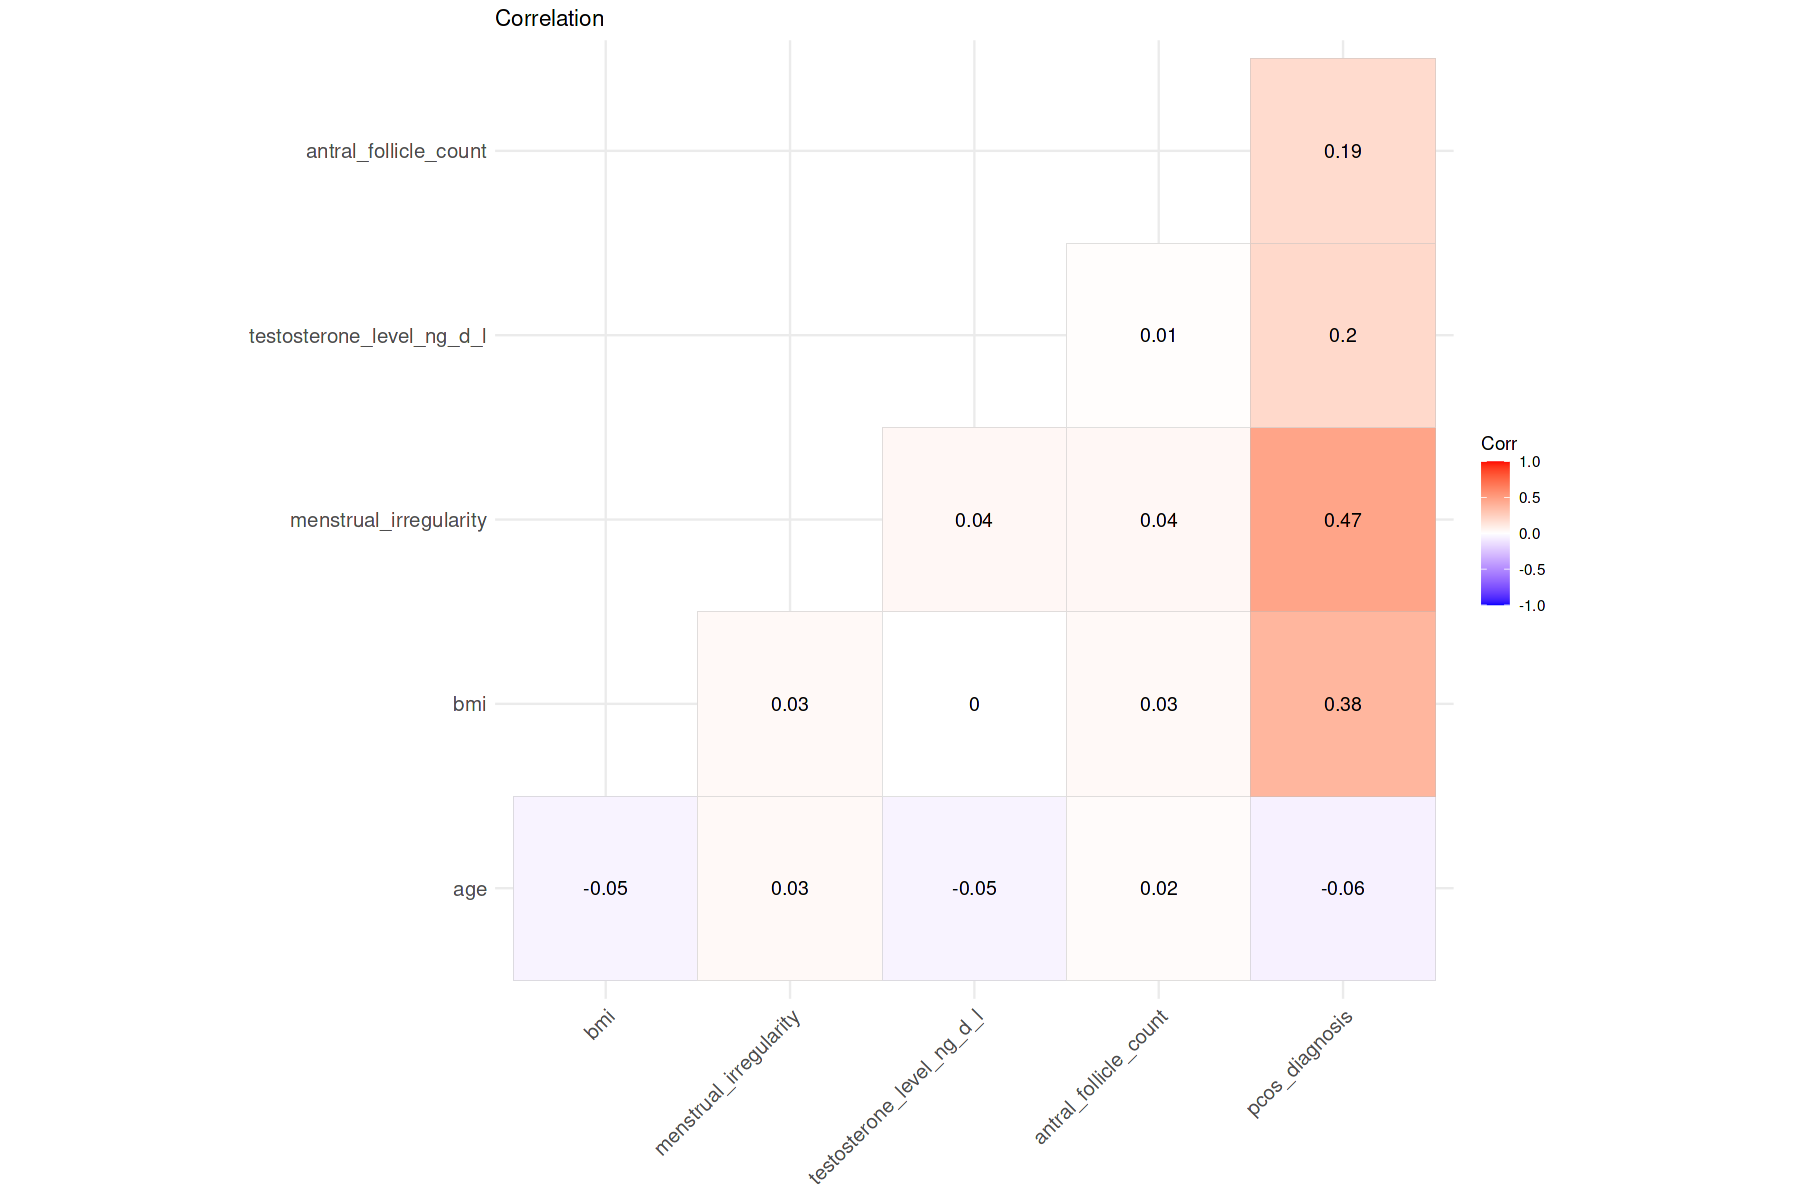

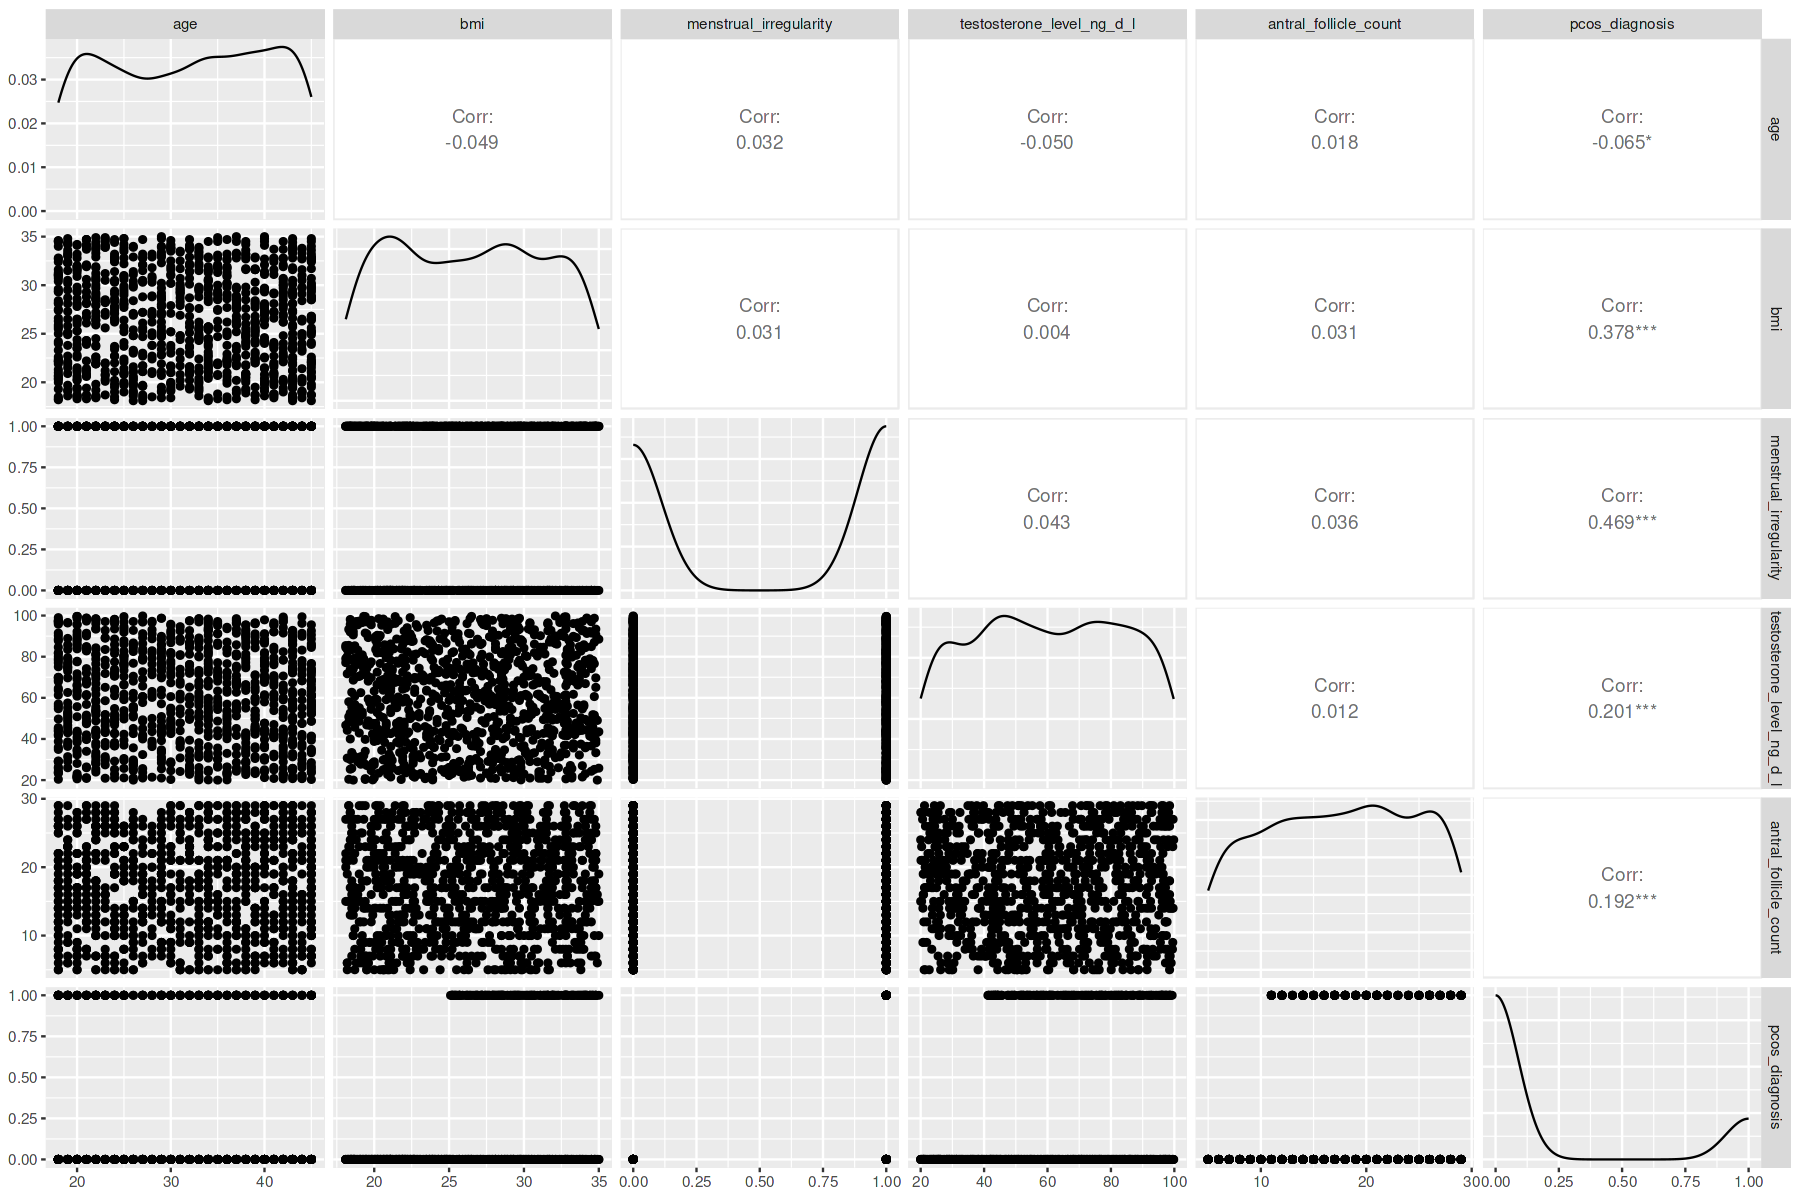

In [162]:
options(repr.plot.width = 15.0, repr.plot.height = 10.0)
ggcorrplot(cor(df[,num_cols], method = 'pearson') , type = "lower", lab=T, title = 'Correlation')

ggpairs(df)

# **3. Modeling**
------------

In [163]:
library(caret)

## **Preprocessing**

In [164]:
df$pcos_diagnosis <- as.factor(df$pcos_diagnosis)

## **SMOTE(Over Sampling)**

In [165]:
library(smotefamily)

smote_result <- SMOTE(X = df[, -6], target = df$pcos_diagnosis, 
                      K = 5, dup_size = 2)

In [166]:
df_smote <- data.frame(smote_result$data)
names(df_smote)[ncol(df_smote)] <- "pcos_diagnosis"
df_smote$pcos_diagnosis <- as.factor(df_smote$pcos_diagnosis)

In [167]:
table(df_smote$pcos_diagnosis)


  0   1 
801 597 

## **Train Test Split**

In [168]:
split <- rsample::initial_split(df_smote, prop = 0.8)
train <- rsample::training(split)
test <- rsample::testing(split)

## **5FOLD**

In [169]:
set.seed(123)
folds <- 
    train %>%
    rsample::vfold_cv(v = 5, strata = pcos_diagnosis)

## **Recipe**

In [170]:
rec <- recipe(pcos_diagnosis ~ ., data = train) %>%
    step_normalize(all_numeric_predictors()) %>%
    step_YeoJohnson(all_numeric_predictors())

rec



── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 5



── Operations 

• Centering and scaling for: all_numeric_predictors()

• Yeo-Johnson transformation on: all_numeric_predictors()



## **ML**

1. **XGBoost**
2. **RandomForest**
----------

## **XGBoost**

In [171]:
xgb_spec <-
  boost_tree(
    trees = tune(),
    tree_depth = tune(),
    learn_rate = tune(),
    mtry = tune(),
    min_n = tune(),
    loss_reduction = tune()
  ) %>%
  set_engine(engine = "xgboost", 
             nthread  = future::availableCores()) %>%
  set_mode(mode = "classification")

In [172]:
xgb_wf <- workflow() %>%
  add_recipe(rec) %>%
  add_model(xgb_spec)

xgb_wf

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: boost_tree()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_normalize()
• step_YeoJohnson()

── Model ───────────────────────────────────────────────────────────────────────
Boosted Tree Model Specification (classification)

Main Arguments:
  mtry = tune()
  trees = tune()
  min_n = tune()
  tree_depth = tune()
  learn_rate = tune()
  loss_reduction = tune()

Engine-Specific Arguments:
  nthread = future::availableCores()

Computational engine: xgboost 


In [173]:
xgb_ctrl <- control_grid(verbose = TRUE,
                         save_pred = TRUE,
                         save_workflow = TRUE)

### **XGBoost Parameters**

In [174]:
params <- xgb_wf %>%
  extract_parameter_set_dials() %>%
  update(
    trees = trees(range = c(200, 1500)),
    mtry = mtry(range = c(5, 20)),
    min_n = min_n(range = c(10, 90)),
    tree_depth = tree_depth(range = c(11, 20)),
    learn_rate = learn_rate(range = c(-2,3))
  ) %>%
  finalize(train)

### **XGBoost Tune**

In [175]:
xgb_res <- tune_grid(
  xgb_wf,
  resamples = folds,
  grid = 4,
  control = xgb_ctrl,
  metrics = metric_set(accuracy),
  param_info = params
)

i Fold1: preprocessor 1/1

✓ Fold1: preprocessor 1/1

i Fold1: preprocessor 1/1, model 1/4

✓ Fold1: preprocessor 1/1, model 1/4

i Fold1: preprocessor 1/1, model 1/4 (extracts)

i Fold1: preprocessor 1/1, model 1/4 (predictions)

i Fold1: preprocessor 1/1, model 2/4

✓ Fold1: preprocessor 1/1, model 2/4

i Fold1: preprocessor 1/1, model 2/4 (extracts)

i Fold1: preprocessor 1/1, model 2/4 (predictions)

i Fold1: preprocessor 1/1, model 3/4

✓ Fold1: preprocessor 1/1, model 3/4

i Fold1: preprocessor 1/1, model 3/4 (extracts)

i Fold1: preprocessor 1/1, model 3/4 (predictions)

i Fold1: preprocessor 1/1, model 4/4

✓ Fold1: preprocessor 1/1, model 4/4

i Fold1: preprocessor 1/1, model 4/4 (extracts)

i Fold1: preprocessor 1/1, model 4/4 (predictions)

i Fold2: preprocessor 1/1

✓ Fold2: preprocessor 1/1

i Fold2: preprocessor 1/1, model 1/4

✓ Fold2: preprocessor 1/1, model 1/4

i Fold2: preprocessor 1/1, model 1/4 (extracts)

i Fold2: preprocessor 1/1, model 1/4 (predictions)

i Fold2

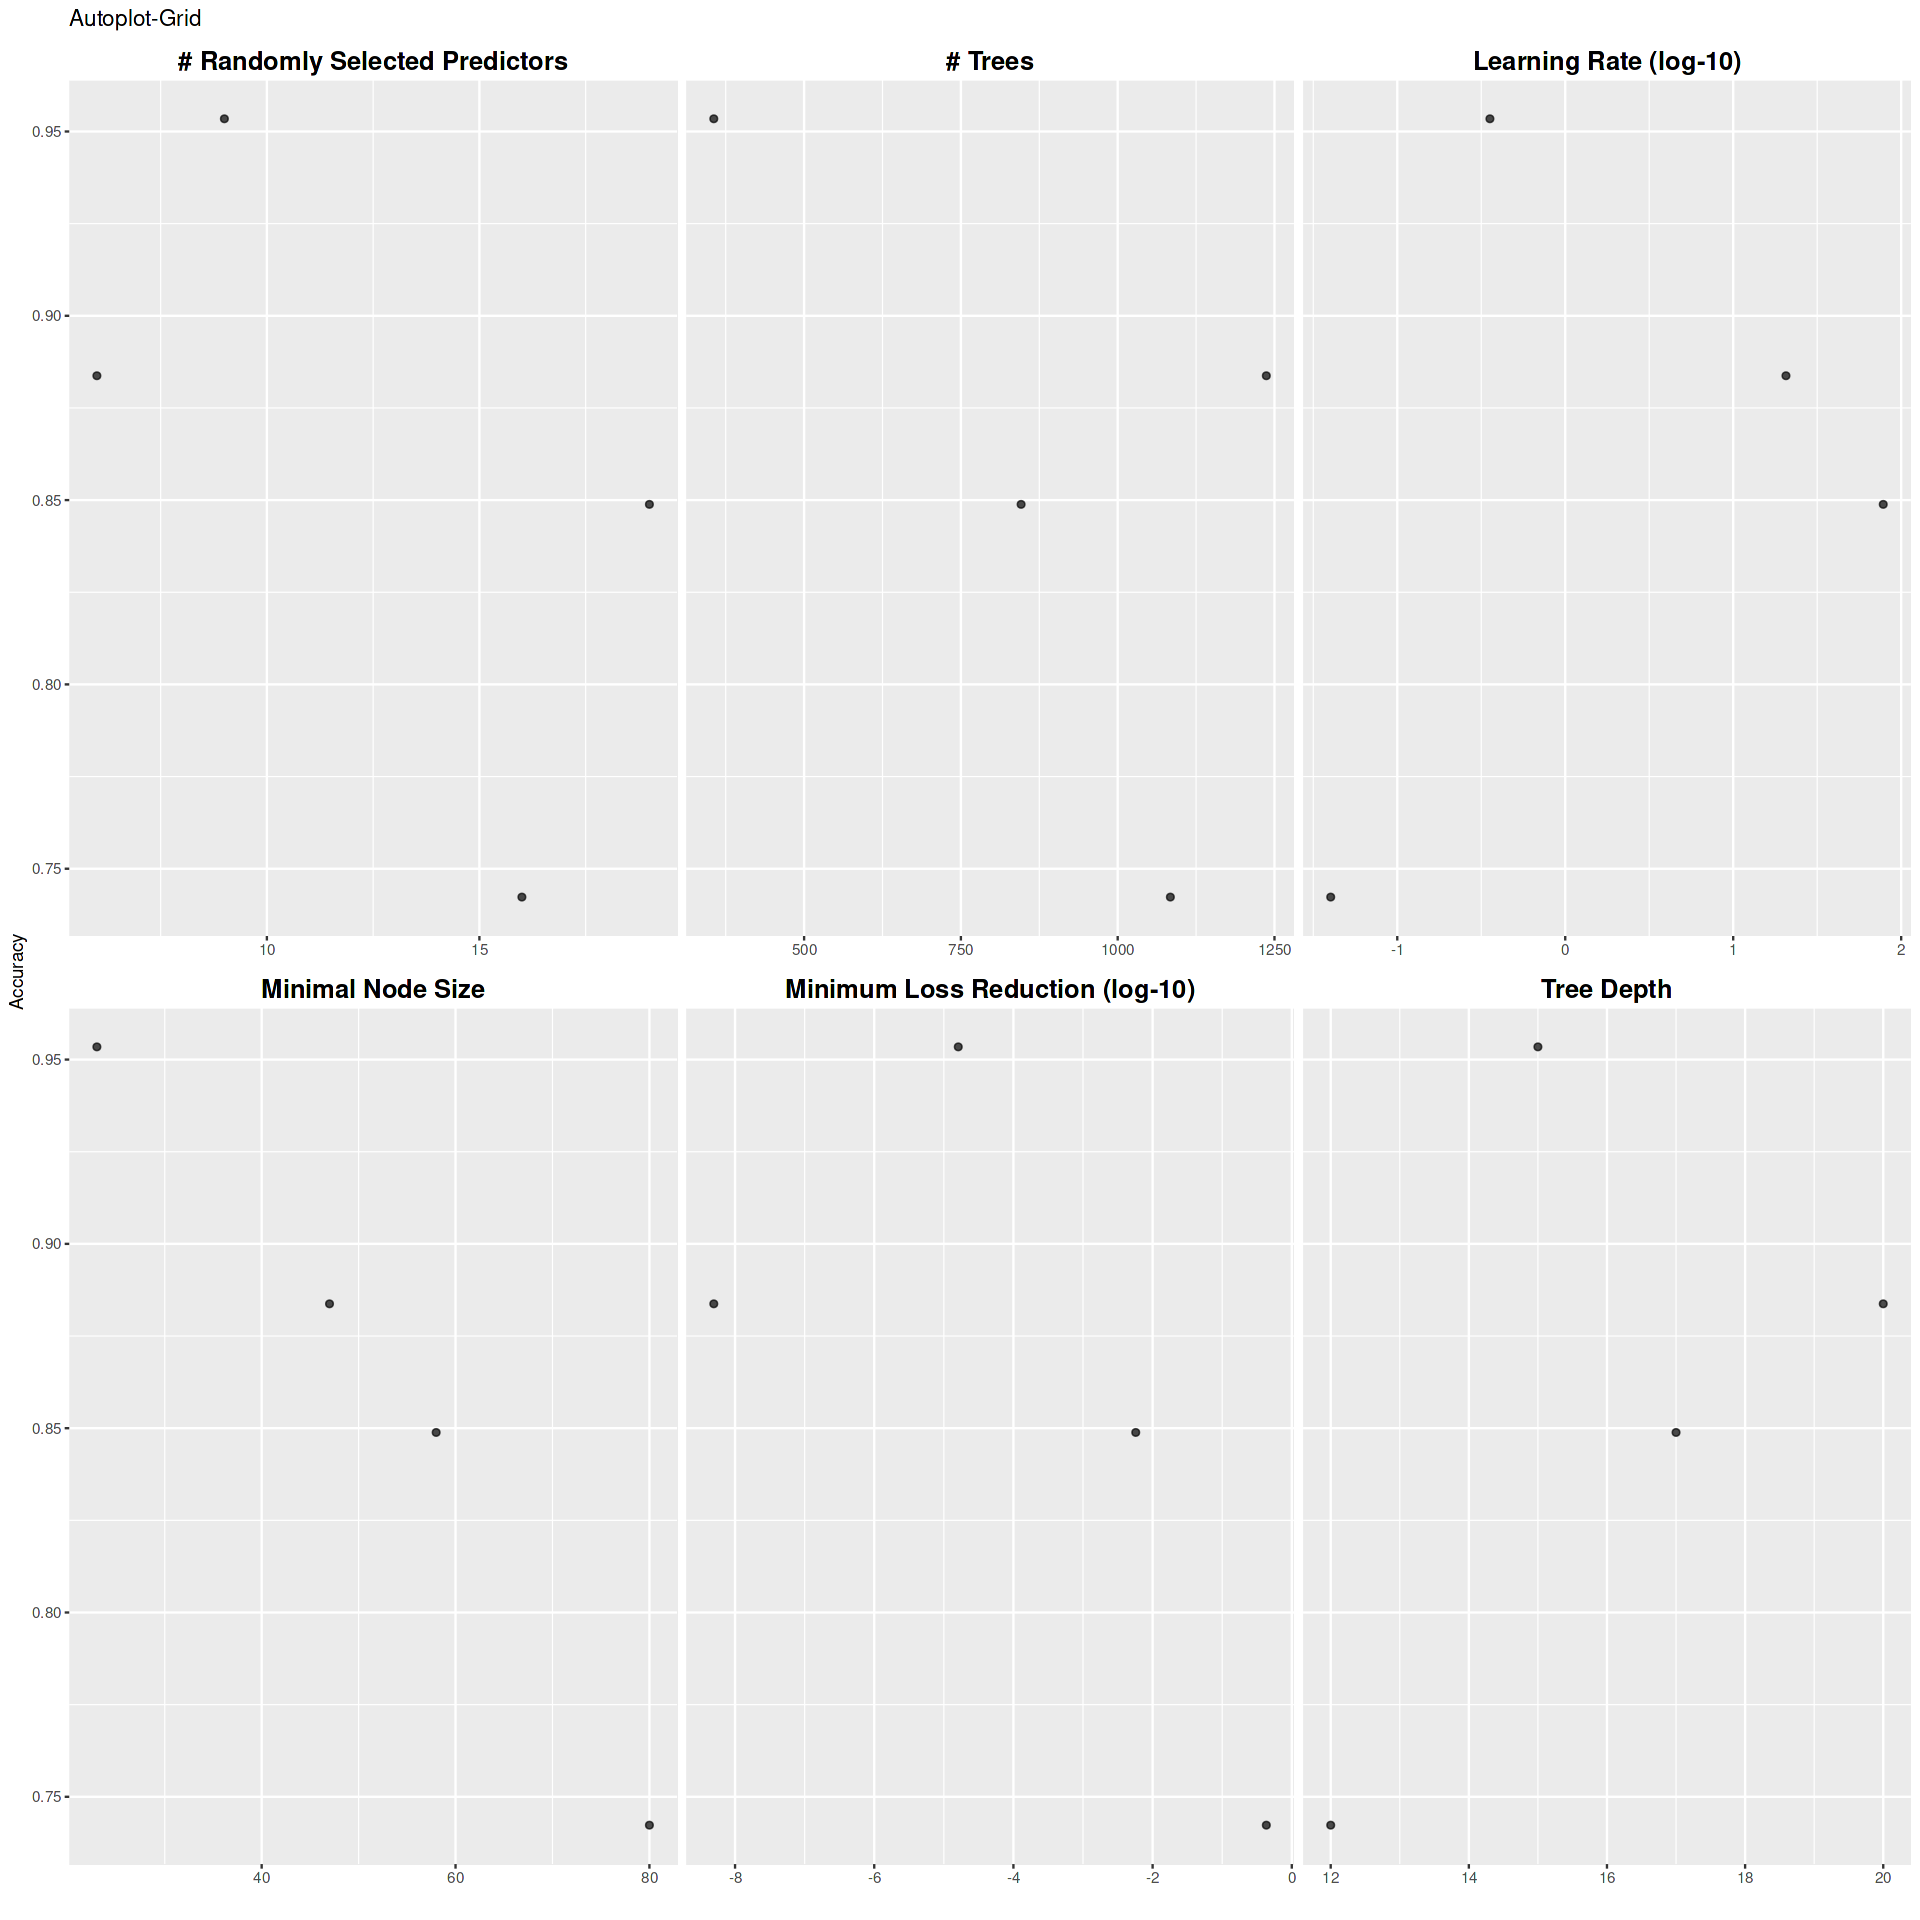

In [176]:
options(repr.plot.width = 16.0, repr.plot.height = 16.0)

autoplot(xgb_res) +
  theme(
    legend.position = "top",
    strip.background = element_rect(fill = "white"),
    strip.background.x = element_rect(colour = "white"),
    strip.background.y = element_rect(colour = "white"),
    strip.text = element_text(
      color = "black",
      face = "bold",
      size = 15
    ),
    
  ) +
  labs(title = "Autoplot-Grid",
    y = "Accuracy")

In [177]:
xgb_best <- select_best(xgb_res, metric = "accuracy")
xgb_best

mtry,trees,min_n,tree_depth,learn_rate,loss_reduction,.config
<int>,<int>,<int>,<int>,<dbl>,<dbl>,<chr>
9,356,23,15,0.3561711,1.612035e-05,Preprocessor1_Model2


In [178]:
set.seed(123)

final_xgb_res <-
  xgb_wf %>%
  finalize_workflow(xgb_best) 

final_xgb_res

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: boost_tree()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_normalize()
• step_YeoJohnson()

── Model ───────────────────────────────────────────────────────────────────────
Boosted Tree Model Specification (classification)

Main Arguments:
  mtry = 9
  trees = 356
  min_n = 23
  tree_depth = 15
  learn_rate = 0.356171130609753
  loss_reduction = 1.61203474205501e-05

Engine-Specific Arguments:
  nthread = future::availableCores()

Computational engine: xgboost 


In [179]:
final_fit <- xgb_wf %>%
  finalize_workflow(select_best(xgb_res, metric = "accuracy")) %>%
  fit(train)

final_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: boost_tree()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_normalize()
• step_YeoJohnson()

── Model ───────────────────────────────────────────────────────────────────────
##### xgb.Booster
raw: 275.8 Kb 
call:
  xgboost::xgb.train(params = list(eta = 0.356171130609753, max_depth = 15L, 
    gamma = 1.61203474205501e-05, colsample_bytree = 1, colsample_bynode = 1, 
    min_child_weight = 23L, subsample = 1), data = x$data, nrounds = 356L, 
    watchlist = x$watchlist, verbose = 0, nthread = c(system = 4), 
    objective = "binary:logistic")
params (as set within xgb.train):
  eta = "0.356171130609753", max_depth = "15", gamma = "1.61203474205501e-05", colsample_bytree = "1", colsample_bynode = "1", min_child_weight = "23", subsample = "1", nthread = "4", objective = "binary:logistic", validate_parameters = "TRUE"
xgb.at

In [180]:
xgb_pred <- predict(final_fit, new_data = test, type = 'class')

### **XGBoost Evaluation**

In [181]:
xgb_pred <- as.data.frame(xgb_pred)
cm_xgb <- confusionMatrix(xgb_pred$.pred_class, test$pcos_diagnosis)
cm_xgb

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 162   7
         1   7 104
                                          
               Accuracy : 0.95            
                 95% CI : (0.9175, 0.9724)
    No Information Rate : 0.6036          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.8955          
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.9586          
            Specificity : 0.9369          
         Pos Pred Value : 0.9586          
         Neg Pred Value : 0.9369          
             Prevalence : 0.6036          
         Detection Rate : 0.5786          
   Detection Prevalence : 0.6036          
      Balanced Accuracy : 0.9478          
                                          
       'Positive' Class : 0               
                              

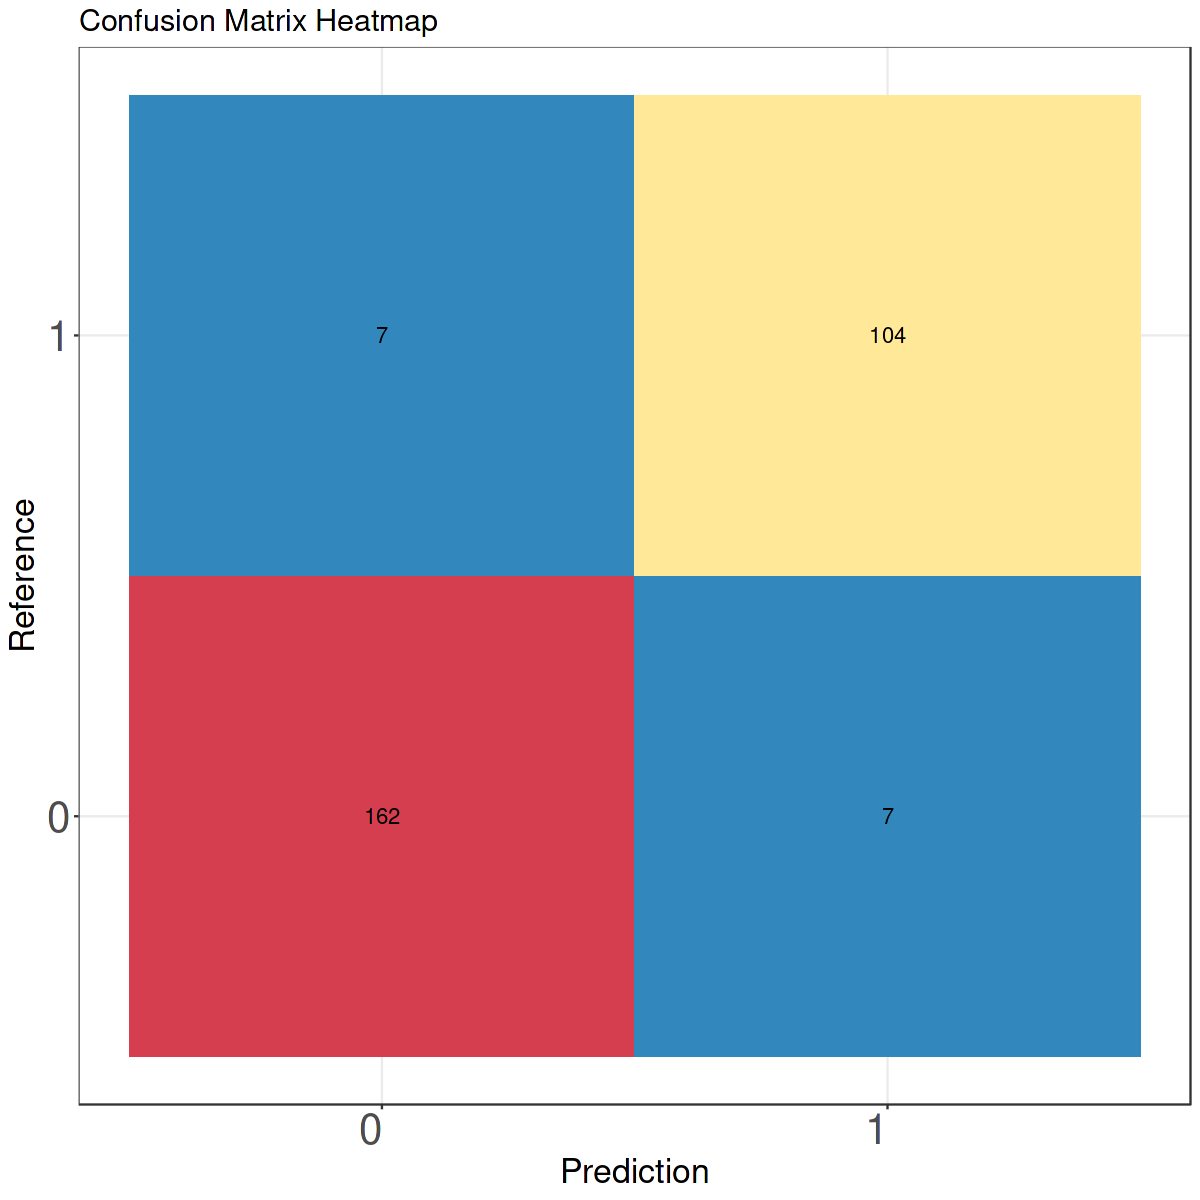

In [182]:
options(repr.plot.width = 10.0, repr.plot.height = 10.0)
#HeatMap
xgb_heatmap <- data.frame(cm_xgb$table)

ggplot(xgb_heatmap) + geom_tile(aes(x= Prediction, y= Reference, fill = Freq)) +
                geom_text(aes(x= Prediction, y= Reference , label = Freq, size = 50), alpha = 5,) +
                scale_fill_distiller(palette = 'Spectral')+
                ggtitle('Confusion Matrix Heatmap') +
                theme_bw() +
                theme(
                legend.position = 'none',
                axis.title = element_text(size=20),
                axis.text.x = element_text(size = 25, hjust=1),
                axis.text.y = element_text(size = 25, hjust=1),
                title = element_text(size=15)
                )

## **RandomForest**

In [183]:
rf_spec <- rand_forest(
    mtry = tune(),
    trees = tune(),
    min_n = tune()) %>%
  set_engine(engine = "ranger") %>%
  set_mode(mode = "classification")

In [184]:
rf_wf <- workflow() %>%
  add_recipe(rec) %>%
  add_model(rf_spec)

rf_wf

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: rand_forest()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_normalize()
• step_YeoJohnson()

── Model ───────────────────────────────────────────────────────────────────────
Random Forest Model Specification (classification)

Main Arguments:
  mtry = tune()
  trees = tune()
  min_n = tune()

Computational engine: ranger 


### **RandomForest Parameter**

In [185]:
rf_grid <- grid_random(
    mtry(range = c(1, ncol(train) - 1)),
    trees(range = c(100, 1000)),
    min_n(range = c(1, 10)),
    size = 10
)

### **RandomForest Tune**

In [186]:
rf_res <- tune_grid(
    rf_wf,
    resamples = folds,
    grid = rf_grid,
    metrics = metric_set(accuracy),
    control = control_grid(save_pred = TRUE)
)

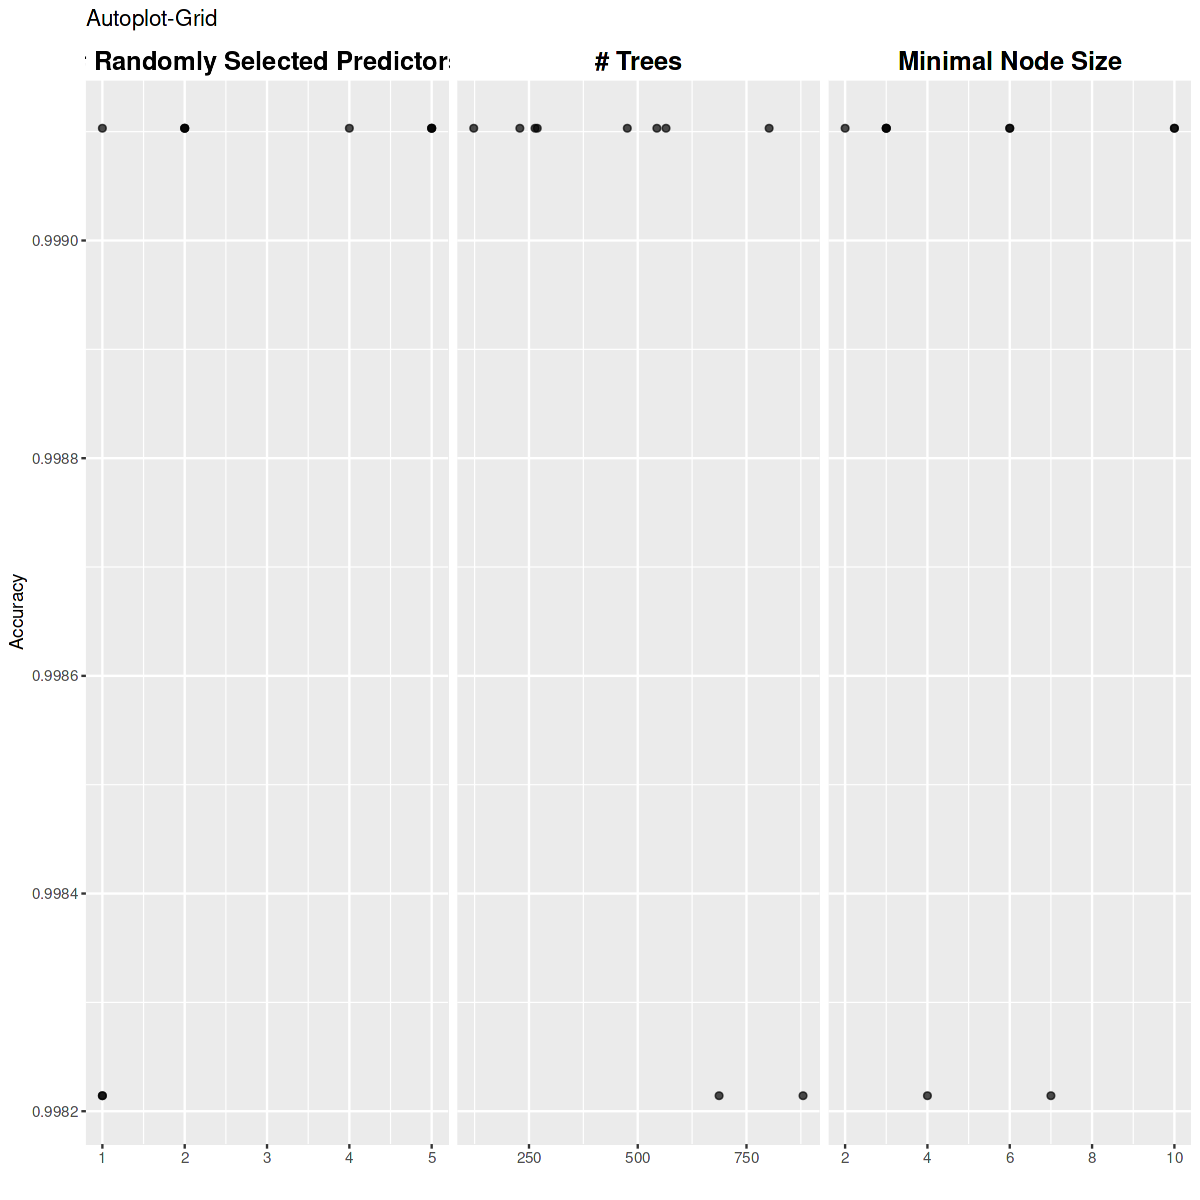

In [187]:
options(repr.plot.width = 10.0, repr.plot.height = 10.0)

autoplot(rf_res) +
  theme(
    legend.position = "top",
    strip.background = element_rect(fill = "white"),
    strip.background.x = element_rect(colour = "white"),
    strip.background.y = element_rect(colour = "white"),
    strip.text = element_text(
      color = "black",
      face = "bold",
      size = 15
    ),
    
  ) +
  labs(title = "Autoplot-Grid",
    y = "Accuracy")

In [188]:
rf_best <- select_best(rf_res, metric = "accuracy")
rf_best

mtry,trees,min_n,.config
<int>,<int>,<int>,<chr>
5,123,6,Preprocessor1_Model01


In [189]:
set.seed(123)

final_rf_res <-
  rf_wf %>%
  finalize_workflow(rf_best) 

final_rf_res

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: rand_forest()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_normalize()
• step_YeoJohnson()

── Model ───────────────────────────────────────────────────────────────────────
Random Forest Model Specification (classification)

Main Arguments:
  mtry = 5
  trees = 123
  min_n = 6

Computational engine: ranger 


In [190]:
final_rf_fit <- rf_wf %>%
  finalize_workflow(select_best(rf_res, metric = "accuracy")) %>%
  fit(train)

final_rf_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: rand_forest()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_normalize()
• step_YeoJohnson()

── Model ───────────────────────────────────────────────────────────────────────
Ranger result

Call:
 ranger::ranger(x = maybe_data_frame(x), y = y, mtry = min_cols(~5L,      x), num.trees = ~123L, min.node.size = min_rows(~6L, x),      num.threads = 1, verbose = FALSE, seed = sample.int(10^5,          1), probability = TRUE) 

Type:                             Probability estimation 
Number of trees:                  123 
Sample size:                      1118 
Number of independent variables:  5 
Mtry:                             5 
Target node size:                 6 
Variable importance mode:         none 
Splitrule:                        gini 
OOB prediction error (Brier s.):  0.0009388418 

In [191]:
rf_pred <- predict(final_rf_fit, new_data = test, type = 'class')

### **RandomForest Evaluation**

In [192]:
rf_pred <- as.data.frame(rf_pred)
cm_rf <- confusionMatrix(rf_pred$.pred_class, test$pcos_diagnosis)
cm_rf

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 169   0
         1   0 111
                                     
               Accuracy : 1          
                 95% CI : (0.9869, 1)
    No Information Rate : 0.6036     
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         
                                     
            Sensitivity : 1.0000     
            Specificity : 1.0000     
         Pos Pred Value : 1.0000     
         Neg Pred Value : 1.0000     
             Prevalence : 0.6036     
         Detection Rate : 0.6036     
   Detection Prevalence : 0.6036     
      Balanced Accuracy : 1.0000     
                                     
       'Positive' Class : 0          
                                     

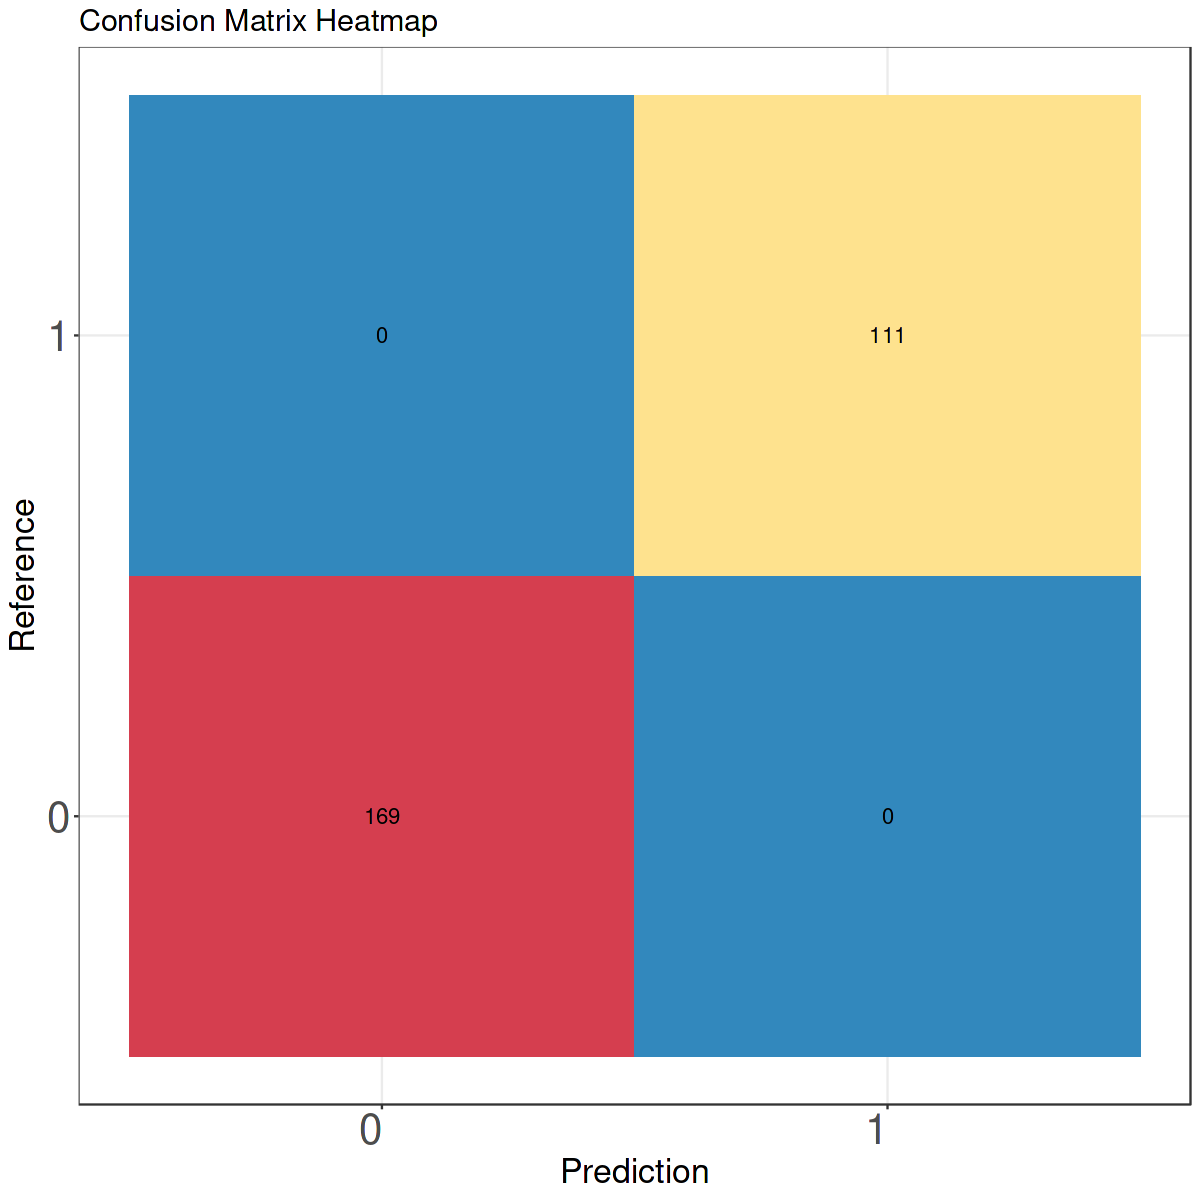

In [193]:
#HeatMap
rf_heatmap <- data.frame(cm_rf$table)

ggplot(rf_heatmap) + geom_tile(aes(x= Prediction, y= Reference, fill = Freq)) +
                geom_text(aes(x= Prediction, y= Reference , label = Freq, size = 50), alpha = 5,) +
                scale_fill_distiller(palette = 'Spectral')+
                ggtitle('Confusion Matrix Heatmap') +
                theme_bw() +
                theme(
                legend.position = 'none',
                axis.title = element_text(size=20),
                axis.text.x = element_text(size = 25, hjust=1),
                axis.text.y = element_text(size = 25, hjust=1),
                title = element_text(size=15)
                )

## **Model Comparison**

In [194]:
acc <- data.frame(model = c('RF','XGB') , Accuracy = c(cm_rf$overall[1], cm_xgb$overall[1]))

In [195]:
acc

model,Accuracy
<chr>,<dbl>
RF,1.00
XGB,0.95


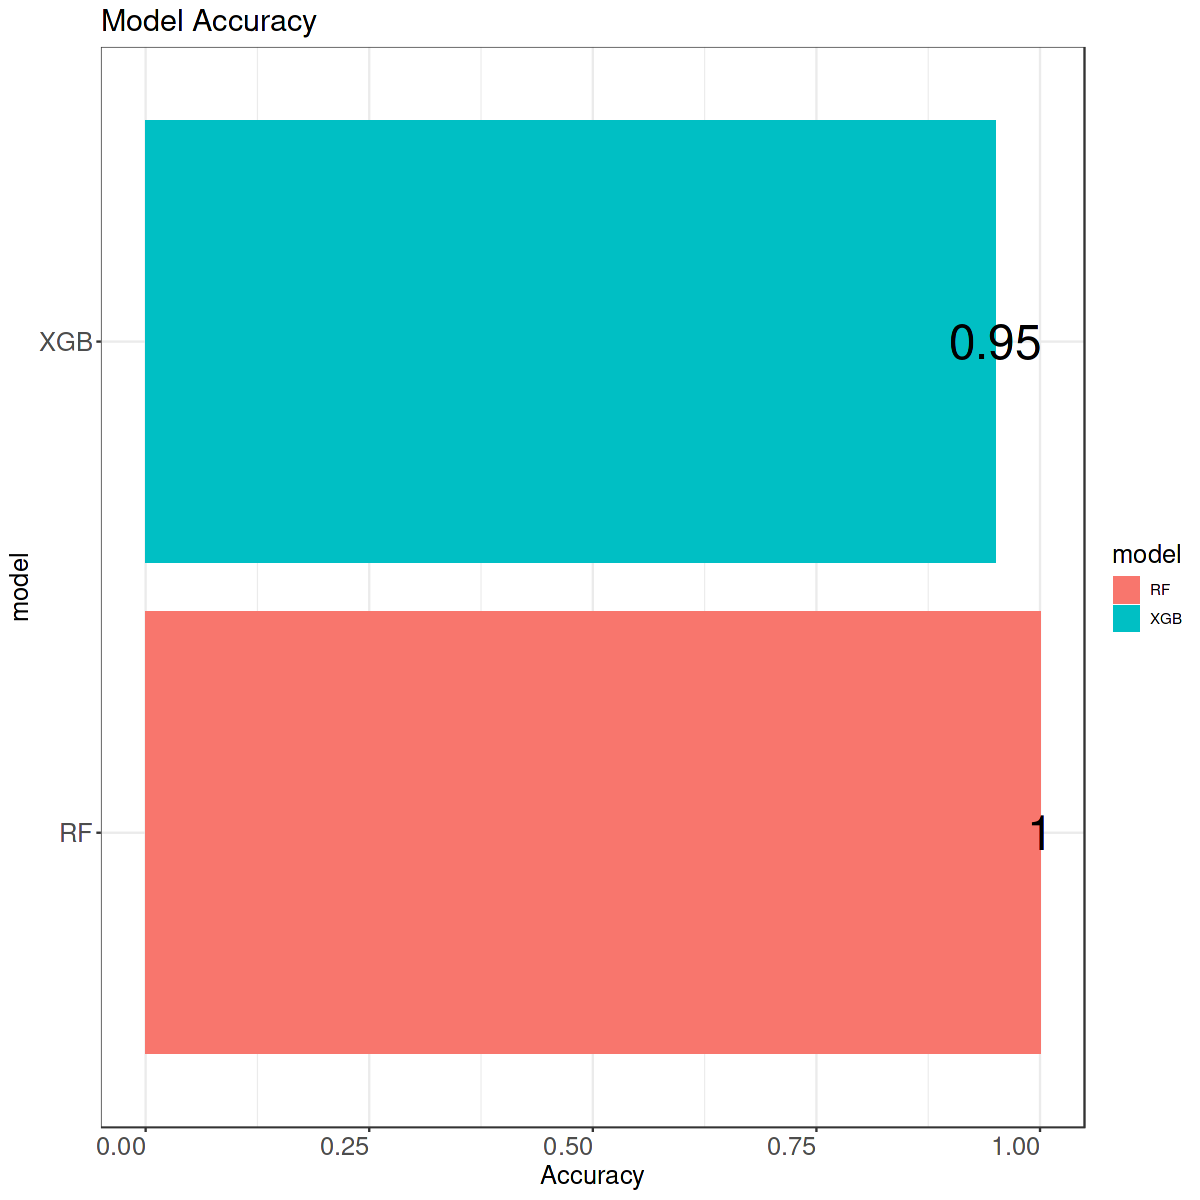

In [196]:
ggplot(acc) + geom_col(aes(y=model , x= Accuracy , fill = model)) +
    geom_text(aes(y = model , x= Accuracy, label= round(Accuracy,2)), hjust=0.5, size = 10) +
    theme_bw() +
    ggtitle('Model Accuracy') + 
    theme(
    axis.title = element_text(size=15),
    axis.text.x = element_text(size = 15, hjust=1),
    axis.text.y = element_text(size = 15),
    title = element_text(size=15)
    )

### **RandomForest is the best models. because, More Accurate.**

-------------

**Thankyou. Please leave your advice in the comments**